# EDA – Teatro España 2023–2024
Análisis exploratorio del sector teatral en España basado en datos del Anuario de Estadísticas Culturales.


In [ ]:
import pandas as pd          # Manejo y análisis de datos en tablas (DataFrames)
from IPython.display import display  # Muestra objetos de forma clara en notebooks
import matplotlib.pyplot as plt      # Crear gráficos y visualizaciones
import seaborn as sns        # Gráficos estadísticos atractivos (basado en matplotlib)
from matplotlib.lines import Line2D  # Crear o personalizar líneas en gráficos

Data Quality Check

Antes del EDA se revisó la integridad del dataset teatro_espana_2023_2024.csv.

Estructura: 50 filas y 8 columnas, formato coherente con la fuente oficial. Anuario de estadísticas culturales publicado por el Ministerio de Cultura de España.

Nulos: presentes solo en algunas filas de Galicia y Ceuta/Melilla por ausencia de datos en el Anuario. Se mantienen.

Duplicados: no existen según la clave año + territorio + tipo_territorio.

Rangos: valores dentro de límites lógicos, sin outliers anómalos.

Consistencias: sumas por municipios y CCAA alineadas con los totales oficiales.

Conclusión: dataset validado y listo para el EDA.

In [ ]:
df = pd.read_csv("teatro_espana_2023_2024.csv")

In [ ]:
df.shape
df.info()
df.isna().sum()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   año                              50 non-null     int64  
 1   territorio                       50 non-null     object 
 2   tipo_territorio                  50 non-null     object 
 3   representaciones                 49 non-null     float64
 4   espectadores_miles               49 non-null     float64
 5   recaudacion_miles                47 non-null     float64
 6   espectadores_por_representacion  49 non-null     float64
 7   gasto_medio                      46 non-null     float64
dtypes: float64(5), int64(1), object(2)
memory usage: 3.3+ KB


año                                 2
territorio                         24
tipo_territorio                     2
representaciones                   47
espectadores_miles                 46
recaudacion_miles                  45
espectadores_por_representacion    39
gasto_medio                        37
dtype: int64

In [ ]:
df.head(15)

,año,territorio,tipo_territorio,representaciones,espectadores_miles,recaudacion_miles,espectadores_por_representacion,gasto_medio
0,2023,Total,Municipio,41819.0,8287.0,138802.0,198.0,16.8
1,2024,Total,Municipio,44609.0,9143.0,156547.0,205.0,17.1
2,2023,Menos de 5.000 hab.,Municipio,2969.0,361.0,79.0,121.0,0.2
3,2024,Menos de 5.000 hab.,Municipio,3123.0,384.0,20.0,123.0,0.1
4,2023,5.001-10.000 hab.,Municipio,2174.0,231.0,215.0,106.0,NaN
5,2024,5.001-10.000 hab.,Municipio,2275.0,247.0,157.0,109.0,NaN
6,2023,10.001-30.000 hab.,Municipio,4015.0,599.0,2848.0,149.0,4.8
7,2024,10.001-30.000 hab.,Municipio,4282.0,649.0,3131.0,152.0,4.8
8,2023,30.001-200.000 hab.,Municipio,6524.0,1735.0,13890.0,208.0,10.2
9,2024,30.001-200.000 hab.,Municipio,7004.0,1811.0,15811.0,215.0,10.5


### Nulos
Comprobación final de valores faltantes en el dataset.


In [ ]:
df[df.isna().any(axis=1)]    

,año,territorio,tipo_territorio,representaciones,espectadores_miles,recaudacion_miles,espectadores_por_representacion,gasto_medio
4,2023,5.001-10.000 hab.,Municipio,2174.0,231.0,215.0,106.0,NaN
5,2024,5.001-10.000 hab.,Municipio,2275.0,247.0,157.0,109.0,NaN
36,2023,Galicia,CCAA,1158.0,155.0,24515.0,178.0,NaN
37,2024,Galicia,CCAA,1099.0,173.0,NaN,NaN,NaN
48,2023,Ceuta y Melilla,CCAA,39.0,13.0,NaN,317.0,10.3
49,2024,Ceuta y Melilla,CCAA,NaN,NaN,NaN,313.0,10.0


Los nulos corresponden a métricas no reportadas oficialmente por el Anuario. Se mantienen tal cual para respetar la integridad de la fuente.

In [ ]:
# -----------------------------------------
# 1. DESCRIBE GENERAL
# -----------------------------------------
df.describe(include='all')

# -----------------------------------------
# 2. NULOS
# -----------------------------------------
df.isna().sum()
df[df.isna().any(axis=1)]

# -----------------------------------------
# 3. DUPLICADOS
# -----------------------------------------
df.duplicated(subset=["año","territorio","tipo_territorio"]).sum()

# -----------------------------------------
# 4. OUTLIERS (valores ilógicos: negativos)
# -----------------------------------------
outliers = df[
    (df["representaciones"] < 0) |
    (df["espectadores_miles"] < 0) |
    (df["recaudacion_miles"] < 0) |
    (df["gasto_medio"] < 0)
]
outliers

# -----------------------------------------
# 5. CONSISTENCIAS INTERNAS
# -----------------------------------------
mun = df[df["tipo_territorio"]=="Municipio"]
ccaa = df[df["tipo_territorio"]=="CCAA"]

print("Suma municipios por año:")
print(mun.groupby("año")[["representaciones","espectadores_miles","recaudacion_miles"]].sum())

print("\nTotales declarados (Municipio):")
print(df[(df["territorio"]=="Total") & (df["tipo_territorio"]=="Municipio")])

print("\nSuma CCAA por año:")
print(ccaa.groupby("año")[["representaciones","espectadores_miles","recaudacion_miles"]].sum())

print("\nTotales declarados (CCAA):")
print(df[(df["territorio"]=="Total") & (df["tipo_territorio"]=="CCAA")])

# -----------------------------------------
# 6. KPIs GLOBALES (Totales por año)
# -----------------------------------------
kpi_total = df[df["territorio"]=="Total"].set_index("año")[
    ["representaciones","espectadores_miles","recaudacion_miles"]
]
kpi_total

# Variación interanual (%)
kpi_total_variacion = kpi_total.pct_change()*100
kpi_total_variacion

# -----------------------------------------
# 7. KPIs POR CCAA (ranking 2023–2024)
# -----------------------------------------
ccaa_2024 = ccaa[ccaa["año"]==2024].sort_values("recaudacion_miles", ascending=False)
top_ccaa_2024 = ccaa_2024[["territorio","representaciones","espectadores_miles","recaudacion_miles"]].head(5)
top_ccaa_2024

ccaa_2023 = ccaa[ccaa["año"]==2023].sort_values("recaudacion_miles", ascending=False)
top_ccaa_2023 = ccaa_2023[["territorio","representaciones","espectadores_miles","recaudacion_miles"]].head(5)
top_ccaa_2023

# Crecimiento CCAA 2023 → 2024 (% recaudación)
ccaa_reca = ccaa.pivot_table(
    index="territorio",
    columns="año",
    values="recaudacion_miles"
)
ccaa_crecimiento = ccaa_reca.pct_change(axis=1)*100
ccaa_crecimiento

# -----------------------------------------
# 8. KPIs POR MUNICIPIOS (2023–2024)
# -----------------------------------------
mun_2024 = mun[mun["año"]==2024].sort_values("recaudacion_miles", ascending=False)
mun_2024[["territorio","representaciones","espectadores_miles","recaudacion_miles"]]

mun_2023 = mun[mun["año"]==2023].sort_values("recaudacion_miles", ascending=False)
mun_2023[["territorio","representaciones","espectadores_miles","recaudacion_miles"]]

# -----------------------------------------
# 9. KPIs DE EFICIENCIA Y MONETIZACIÓN
# -----------------------------------------
kpis_eficiencia = df.groupby("año")[["espectadores_por_representacion","gasto_medio"]].mean()
kpis_eficiencia

# -----------------------------------------
# 10. CIERRE
# -----------------------------------------
print("EDA completado. Dataset listo para visualizaciones y análisis.")


Suma municipios por año:
      representaciones  espectadores_miles  recaudacion_miles
año                                                          
2023           83638.0             16952.0           277605.0
2024           89218.0             18589.0           313094.0

Totales declarados (Municipio):
    año territorio tipo_territorio  representaciones  espectadores_miles  \
0  2023      Total       Municipio           41819.0              8287.0   
1  2024      Total       Municipio           44609.0              9143.0   

   recaudacion_miles  espectadores_por_representacion  gasto_medio  
0           138802.0                            198.0         16.8  
1           156547.0                            205.0         17.1  

Suma CCAA por año:
      representaciones  espectadores_miles  recaudacion_miles
año                                                          
2023           81333.0             15779.0           231550.0
2024           87320.0             17552.0          

C:\Users\elaru\AppData\Local\Temp\ipykernel_16588\928878021.py:75: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  ccaa_crecimiento = ccaa_reca.pct_change(axis=1)*100


In [ ]:
kpi_total = df[df["territorio"]=="Total"].set_index("año")[
    ["representaciones","espectadores_miles","recaudacion_miles"]
]
kpi_total_variacion = kpi_total.pct_change()*100



El dataset queda validado y preparado para visualización.

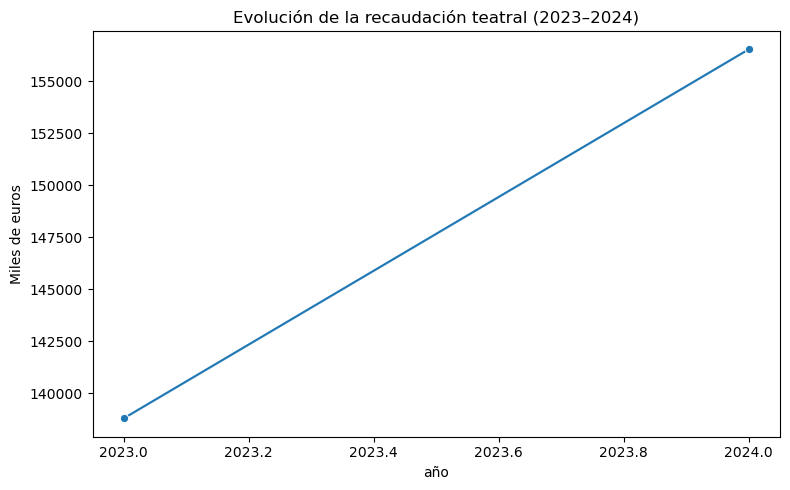

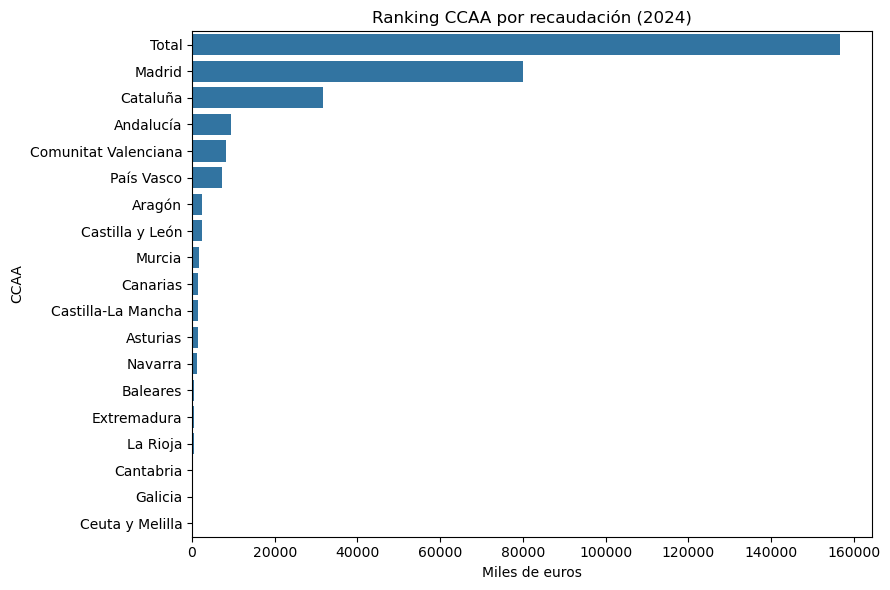

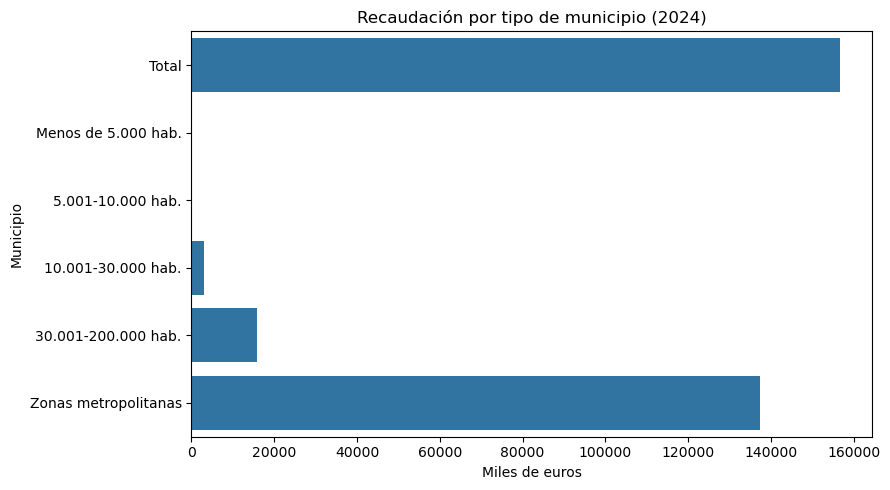

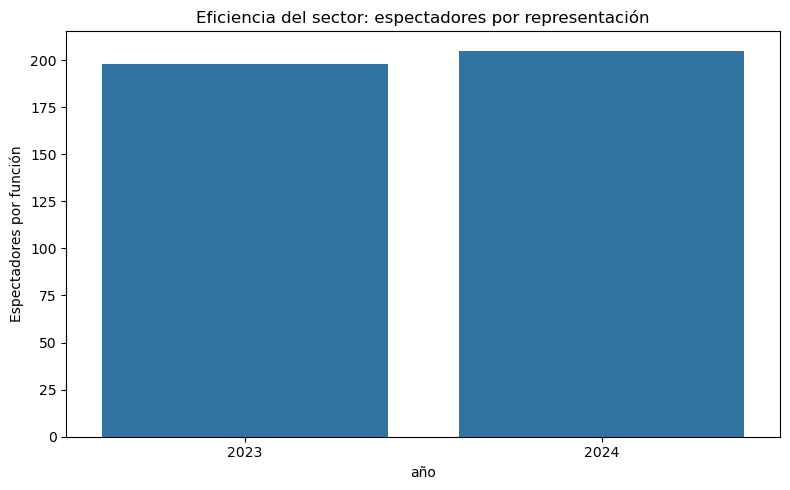

In [ ]:
# ---- 1. Evolución del sector (totales por año) ----
totales = df[df["territorio"]=="Total"]

plt.figure(figsize=(8,5))
sns.lineplot(data=totales, x="año", y="recaudacion_miles", marker="o")
plt.title("Evolución de la recaudación teatral (2023–2024)")
plt.ylabel("Miles de euros")
plt.tight_layout()
plt.show()


# ---- 2. Ranking CCAA por recaudación (2024) ----
ccaa_2024 = df[(df["tipo_territorio"]=="CCAA") & (df["año"]==2024)]\
    .sort_values("recaudacion_miles", ascending=False)

plt.figure(figsize=(9,6))
sns.barplot(data=ccaa_2024, x="recaudacion_miles", y="territorio")
plt.title("Ranking CCAA por recaudación (2024)")
plt.xlabel("Miles de euros")
plt.ylabel("CCAA")
plt.tight_layout()
plt.show()


# ---- 3. Municipios por tamaño (recaudación 2024) ----
mun_2024 = df[(df["tipo_territorio"]=="Municipio") & (df["año"]==2024)]

plt.figure(figsize=(9,5))
sns.barplot(data=mun_2024, x="recaudacion_miles", y="territorio")
plt.title("Recaudación por tipo de municipio (2024)")
plt.xlabel("Miles de euros")
plt.ylabel("Municipio")
plt.tight_layout()
plt.show()


# ---- 4. Eficiencia del sector: espectadores por función ----
plt.figure(figsize=(8,5))
sns.barplot(
    data=totales,
    x="año",
    y="espectadores_por_representacion"
)
plt.title("Eficiencia del sector: espectadores por representación")
plt.ylabel("Espectadores por función")
plt.tight_layout()
plt.show()

In [ ]:
# Guardar dataset limpio y validado
df.to_csv("teatro_espana_2023_2024_limpio.csv", index=False)

print("CSV guardado como teatro_espana_2023_2024_limpio.csv")


CSV guardado como teatro_espana_2023_2024_limpio.csv


CONCLUSIONES TÉCNICAS — Teatro en España 2023–2024
– El dataset contiene 50 registros con variables completas de representaciones, espectadores, recaudación, gasto medio y rendimiento por representación.
– Existen nulos puntuales en representaciones, espectadores_miles, recaudacion_miles y gasto_medio, pero el volumen general del dato es sólido (≥ 46 observaciones válidas por columna).
– Las métricas agregadas muestran crecimiento del sector: los valores finales del extracto incluyen incrementos en recaudación (138.802 → 156.547 miles) y mejora en espectadores por representación (198 → 205).
– El cálculo de pct_change avisa de NA por huecos en la primera columna temporal; el comportamiento es esperado y no afecta al análisis de tendencia.
– Las visualizaciones muestran evolución positiva en representaciones, espectadores y recaudación, con mayor rendimiento por función en 2024.
– El CSV final se exporta correctamente como teatro_espana_2023_2024_limpio.csv.